In [107]:
# 1vs1 match functions
def winner_civ(player, dict_civ):
    if player[0]['won'] == True:
        return dict_civ[player[0]['civ']] 
    else:
        return dict_civ[player[1]['civ']]

def loser_civ(player, dict_civ):
    if player[0]['won'] == False:
        return dict_civ[player[0]['civ']] 
    else:
        return dict_civ[player[1]['civ']]

def get_average_rating (players):
    rat1=players[0]['rating']
    rat2=players[1]['rating']
    if rat1 == None or rat2 == None:
        if rat1 != None:
            return rat1
        if rat2 != None:
            return rat2
        
        return None
    else:
        return (rat1 + rat2)/2

# team match functions
def get_winner_team_number(players):
    for player in players:
        if player['won'] == True:
            return player['team']

def winner_civ_team(players, dict_civ, position):
    list_pos=[]
    for player in players:
        if player['won'] == True:
            t = (player['color'], player['civ'])
            list_pos.append(t)
    
    list_pos.sort()
    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]

def loser_civ_team(players, dict_civ, position):
    list_pos=[]
    winner_number=get_winner_team_number(players)
    for player in players:
        if player['won'] == False:
            if player['team'] != winner_number:
                t = (player['color'], player['civ'])
                list_pos.append(t)
    
    list_pos.sort()
    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]

def get_average_rating_team(players):
    rat_sum=0
    divider=0
    num_players=len(players)
    for player in players:
        if player['rating'] != None:
            rat_sum += player['rating']
            divider += 1
            
    if (divider < (num_players/2)):
        return None
    else:
        return (rat_sum/divider)

In [108]:
has_relevant_water = {
            "Arabia": False,
            "Archipelago": True,
            "Baltic": True,
            "Black Forest": False,
            "Coastal": True,
            "Continental": True,
            "Crater Lake": True,
            "Fortress": False,
            "Gold Rush": False,
            "Highland": True,
            "Islands": False,
            "Mediterranean": False,
            "Migration": False,
            "Rivers": False,
            "Team Islands": False,
            "Full Random": True,
            "Scandinavia": True,
            "Mongolia": False,
            "Yucatan": False,
            "Salt Marsh": True,
            "Arena": False,
            "Oasis": True,
            "Ghost Lake": False,
            "Nomad": True,
            "Iberia": True,
            "Britain": True,
            "Mideast": True,
            "Texas": True,
            "Italy": True,
            "Central America": True,
            "France": True,
            "Norse Lands": True,
            "Sea of Japan (East Sea)": True,
            "Byzantium": True,
            "Custom": True,
            "Random Land Map": False,
            "Random Real World Map": True,
            "Blind Random": True,
            "Random Special Map": True,
            "Acropolis": False,
            "Budapest": True,
            "Cenotes": True,
            "City of Lakes": True,
            "Golden Pit": False,
            "Hideout": False,
            "Hill Fort": False,
            "Lombardia": False,
            "Steppe": False,
            "Valley": False,
            "MegaRandom": True,
            "Hamburger": True,
            "CtR Random": True,
            "CtR Monsoon": False,
            "CtR Pyramid Descent": False,
            "CtR Spiral": False,
            "Kilimanjaro": False,
            "Mountain Pass": False,
            "Nile Delta": True,
            "Serengeti": False,
            "Socotra": False,
            "Amazon": True,
            "China": True,
            "Horn of Africa": True,
            "India": True,
            "Madagascar": True,
            "West Africa": True,
            "Bohemia": False,
            "Earth": True,
            "Canyons": False,
            "Enemy Archipelago": True,
            "Enemy Islands": True,
            "Far Out": False,
            "Front Line": False,
            "Inner Circle": False,
            "Motherland": True,
            "Open Plains": False,
            "Ring of Water": True,
            "Snakepit": True,
            "The Eye": True,
            "Australia": True,
            "Indochina": True,
            "Indonesia": True,
            "Strait of Malacca": True,
            "Philippines": True,
            "Bog Islands": True,
            "Mangrove Jungle": True,
            "Pacific Islands": True,
            "Sandbank": False,
            "Water Nomad": True,
            "Jungle Islands": True,
            "Holy Line": False,
            "Border Stones": False,
            "Yin Yang": True,
            "Jungle Lanes": False,
            "Alpine Lakes": False,
            "Bogland": False,
            "Mountain Ridge": False,
            "Ravines": False,
            "Wolf Hill": False,
            "Antarctica": True,
            "Custom Map Pool": True,
            "Golden Swamp": True,
            "Four Lakes": True,
            "Land Nomad": False
            }
import requests
import json

url="https://aoe2.net/api/strings?game=aoe2de&language=en"
req=requests.get(url)
dict_file=json.loads(req.content)

civ_dict={}
for civ in dict_file['civ']:
    civ_dict[civ['id']]=civ['string']

map_dict={}
for map_t in dict_file['map_type']:
    map_dict[map_t['id']]=map_t['string']

In [109]:
import pandas
from IPython.display import display
import matplotlib.pyplot as plt

df=pandas.read_json('matches_dataset_filtered.json', dtype={'match_id': int, 'match_uuid': 'string', 'num_players': int,
                                                        'map_type' : int, 'rating_type': int,'visibility' : int,
                                                        'players' : [dict]})
pandas.options.display.max_columns = None

In [110]:
df['num_players']=df['num_players'].astype('category')
df['map_type']=df['map_type'].astype('category')
df['rating_type']=df['rating_type'].astype('category')
df['visibility']=df['visibility'].astype('category')

In [111]:
df.dtypes

map_type       category
match_id          int64
match_uuid       object
num_players    category
players          object
rating_type    category
visibility     category
duration          int64
dtype: object

Verificamos se o mapa tem água de forma distribuída por sua área, pois tecnologias e unidades navais só são relevantes para a analse se o mapa tiver água.

In [112]:
df['has_relevant_water']=df['map_type'].map(map_dict)
df['has_relevant_water']=df['has_relevant_water'].map(has_relevant_water)
df['has_relevant_water']=df['has_relevant_water'].astype('category')

In [113]:
df

,map_type,match_id,match_uuid,num_players,players,rating_type,visibility,duration,has_relevant_water
0,9,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",2,0,62,False
1,9,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",2,0,41,False
2,9,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",2,0,45,False
3,125,40745193,30c01441-cba8-584f-8585-777eea38d6fd,4,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",4,0,116,False
4,9,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",2,0,96,False
...,...,...,...,...,...,...,...,...,...
59989,29,42259211,fba9486f-1954-6b4f-a37f-d9b55012de9c,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",2,0,43,False
59990,29,42259160,711b0658-7607-7f4f-8155-dbcc7075d238,8,"[{'civ': 20, 'clan': None, 'color': 4, 'countr...",4,0,127,False
59996,87,42259214,a5247657-5067-3c47-96f0-0dc3a834063d,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",2,0,63,False
59997,12,42259207,441f5659-fb65-f649-b758-97bf52745f75,8,"[{'civ': 21, 'clan': None, 'color': 4, 'countr...",4,1,89,False


Separamos o DataFrame em dois: um para partidas onde há apenas um jogador contra outro, "df_x1", e outro para partidas de time, "df_team". As dinâmicas de times, sinergia entre as civilizações e se uma está em uma posição de flanco enquanto seu aliado fica por trás das linhas de combate influenciam no combate.

In [114]:
df_x1=df[df['rating_type'] == 2]
df_team=df[df['rating_type'] == 4]

df_x1=df_x1.drop('rating_type', 1)
df_team=df_team.drop('rating_type', 1)

extraímos qual civilização ganhou ou perdeu, a partir da coluna "players", e criamos duas colunas: "wCiv" para os vencedores e "lCiv" para os perdedores.

Também extraímos a informação da classificação (ou "rating") de cada jogador e calculamos o "rating" médio da partida. Os jogadores são pareados na partida através da sua classificação, o que significa que os jogadores das partidas têm classificações muito próximas. Portanto, em df_x1, se a informação da classificação de um dos jogadores não estiver presente, o "rating" médio será calculado como sendo equivalente ao rating do outro jogador.

In [115]:
df_x1['wCiv']=df_x1['players'].apply(winner_civ, args=(civ_dict, ))

df_x1['lCiv']=df_x1['players'].apply(loser_civ, args=(civ_dict, ))

df_x1['average_rating']=df_x1['players'].apply(get_average_rating)

In [116]:
df_x1['wCiv']=df_x1['wCiv'].astype('category')
df_x1['lCiv']=df_x1['lCiv'].astype('category')

In [117]:
len(df_x1)

22225

In [118]:
len(df_x1[df_x1['average_rating'].isnull()])

122

Em algumas partidas a classificação de ambos os jogadores foi perdida, portanto algumas linhas na coluna "average_rating" ficaram como "NaN", como são poucas linhas optamos por excluí-las.

In [119]:
df_x1=df_x1[df_x1['average_rating'].isnull() == False]
df_x1

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
0,9,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",0,62,False,Byzantines,Magyars,1234.0
1,9,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,41,False,Incas,Britons,1111.0
2,9,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,45,False,Ethiopians,Mayans,1202.5
4,9,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,96,False,Mayans,Franks,1453.0
16,9,40745343,3b1f86e3-85d4-7248-912b-1506c1d0f44b,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,53,False,Magyars,Vikings,1167.0
...,...,...,...,...,...,...,...,...,...,...,...
59985,9,42259167,3e33efe4-02c4-c34f-b47c-f5097b2eae19,2,"[{'civ': 7, 'clan': None, 'color': 2, 'country...",0,63,False,Chinese,Chinese,1692.5
59988,9,42259216,fbf6ea6a-08ff-d746-8403-f4f45d932b15,2,"[{'civ': 13, 'clan': None, 'color': 2, 'countr...",0,82,False,Byzantines,Incas,926.5
59989,29,42259211,fba9486f-1954-6b4f-a37f-d9b55012de9c,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,43,False,Franks,Mongols,1103.0
59996,87,42259214,a5247657-5067-3c47-96f0-0dc3a834063d,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,63,False,Franks,Goths,1297.5


Semelhante como fizemos em df_x1, criamos colunas para os vencedores e perdedores, as partidas podem ter até 4 jogadores por time, portanto separamos 4 colunas para os vencedores e 4 colunas para os perdedores, caso os times sejam compostos por 3 membros cada, as ultimas colunas terão o valor "None" atribuído a elas, analogamente acontece se a partida for compostas por times de 2 participantes em cada.

As civilizaçẽos estão dispostas nas colunas respeitando a ordem em que elas estavam distribuídas em batalha, um exemplo: em um jogo de 3 contra 3, a coluna "wCiv1" seria ocupada pela civilização, do time vencedor, que estava em um dos flanco da batalha, a coluna "wCiv2" seria ocupada pela civilização do time vencedor que ficou guardada entre suas aliadas, e a coluna "wCiv3" seria ocupada pela civilização, do time vencedor, que estava no outro flanco da batalha, analogamente acontece com o time perdedor. De forma semelhante acontece com partidas de 4 jogadores contra 4 jogadores.

Semelhante como fizemos em df_x1, calculamos o "rating" médio da partida. Porém, em df_team, caso a informação sobre a classificação de mais da metade dos jogadores estivesse ausente, o valor atribuído seria NaN, caso ao menos metade dos jogadores estivessem com sua classificação presente nos dados, o "rating" médio seria a média do "rating" desses jogadores restantes.

In [120]:
df_team['wCiv1']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 1))
df_team['wCiv2']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 2))
df_team['wCiv3']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 3))
df_team['wCiv4']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 4))

df_team['lCiv1']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 1))
df_team['lCiv2']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 2))
df_team['lCiv3']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 3))
df_team['lCiv4']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 4))


df_team['average_rating']=df_team['players'].apply(get_average_rating_team)

In [121]:
df_team['wCiv1']=df_team['wCiv1'].astype('category')
df_team['wCiv2']=df_team['wCiv2'].astype('category')
df_team['wCiv3']=df_team['wCiv3'].astype('category')
df_team['wCiv4']=df_team['wCiv4'].astype('category')

df_team['lCiv1']=df_team['lCiv1'].astype('category')
df_team['lCiv2']=df_team['lCiv2'].astype('category')
df_team['lCiv3']=df_team['lCiv3'].astype('category')
df_team['lCiv4']=df_team['lCiv4'].astype('category')

In [122]:
len(df_team)

10349

In [123]:
len(df_team[df_team['average_rating'].isnull()])

159

Da mesma forma que fizemos em df_x1, excluímos as linhas que continuaram como "NaN" em "average_rating".

In [124]:
df_team=df_team[df_team['average_rating'].isnull() == False]
df_team

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating
3,125,40745193,30c01441-cba8-584f-8585-777eea38d6fd,4,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,116,False,Franks,Huns,NaN,NaN,Franks,Khmer,NaN,NaN,1439.500
5,9,40745180,0a591dc0-7ab5-8b45-9da9-87d287fa4827,4,"[{'civ': 9, 'clan': None, 'color': 2, 'country...",0,56,False,Franks,Mayans,NaN,NaN,Ethiopians,Franks,NaN,NaN,1494.000
6,9,40745166,a8c826b9-a658-ed4f-a1cd-58cd8a261506,6,"[{'civ': 8, 'clan': None, 'color': 2, 'country...",0,67,False,Ethiopians,Indians,Franks,NaN,Cumans,Slavs,Huns,NaN,1472.500
22,71,40745240,69965a43-38dc-ad48-935f-9bbbadac46cb,4,"[{'civ': 23, 'clan': None, 'color': 4, 'countr...",0,45,False,Franks,Lithuanians,NaN,NaN,Celts,Mayans,NaN,NaN,2184.500
23,31,40745186,b916efdb-1643-4743-8ed3-79a9b03e5d01,6,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,80,True,Mongols,Britons,Huns,NaN,Mayans,Britons,Lithuanians,NaN,1073.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59970,74,42259053,1d0f3d91-4c45-4649-95df-651136619255,4,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,99,False,Franks,Huns,NaN,NaN,Goths,Ethiopians,NaN,NaN,1063.250
59974,9,42259180,af4c92b1-9321-2e4a-8c13-cf825c7a6108,4,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,59,False,Slavs,Vietnamese,NaN,NaN,Vikings,Franks,NaN,NaN,1153.000
59980,9,42259099,c22467be-c624-e349-9779-549f77848fdc,8,"[{'civ': 29, 'clan': None, 'color': 4, 'countr...",0,76,False,Saracens,Lithuanians,Aztecs,Franks,Khmer,Spanish,Japanese,Mongols,1624.000
59990,29,42259160,711b0658-7607-7f4f-8155-dbcc7075d238,8,"[{'civ': 20, 'clan': None, 'color': 4, 'countr...",0,127,False,Persians,Magyars,Franks,Aztecs,Britons,Goths,Malians,Spanish,1280.625


In [125]:
df_x1.to_json('x1_matches_dataset.json')

df_team.to_json('team_matches_dataset.json')

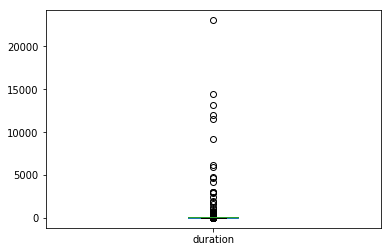

In [126]:
df_x1['duration'].plot.box()

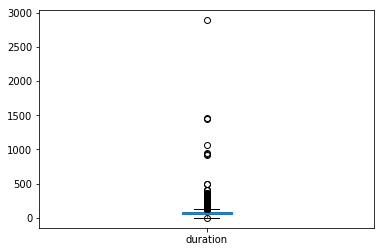

In [127]:
df_team['duration'].plot.box()